<a href="https://colab.research.google.com/github/MostafaH04/Projectile-Launcher/blob/main/Projectile_launcher.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from math import cos, sin, pi, pow

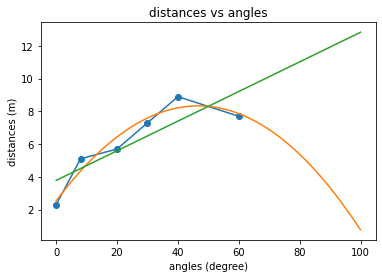

In [ ]:
angles = [0, 8, 20, 30, 40, 60]
distances = [2.3, 5.1, 5.7, 7.3, 8.9, 7.7]

# set up scatter graph with points and labels
plt.scatter(angles, distances)
plt.ylabel("distances (m)")
plt.xlabel("angles (degree)")
plt.title("distances vs angles")

# plot lines connecting data points
plt.plot(angles, distances)

# use built in numpy function to create curve of best fit

# setup numpy arrays
npAngles = np.array(angles)
npDistances = np.array(distances)

permsCurve = np.polyfit(npAngles, npDistances, 2)

anglesBestFit = np.linspace(0,100, 1001)

bestFitCurve = permsCurve[2] + permsCurve[1] * anglesBestFit + permsCurve[0] * anglesBestFit * anglesBestFit

plt.plot(anglesBestFit, bestFitCurve)

# also line of best fit

permsLine = np.polyfit(npAngles, npDistances, 1)

bestFitLine = permsLine[1] + permsLine[0] * anglesBestFit

plt.plot(anglesBestFit, bestFitLine)

Text(0.5, 1.0, 'distances vs angles')

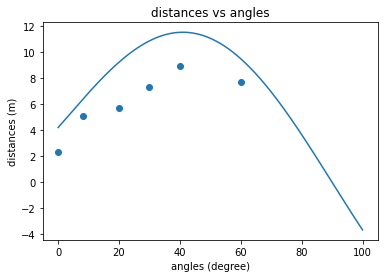

In [ ]:
def theoretical(angles, radius, height, velocity, gravity = 9.8):
  out = []
  for angle in angles:
    newAngles = angle * pi/180
    curr = velocity*cos(newAngles) * (velocity * sin(newAngles) + ((velocity*sin(newAngles))**2+2*gravity*(height+radius*sin(newAngles)))**(1/2))
    out.append(curr)
  return out

plt.plot(anglesBestFit, theoretical(anglesBestFit,0.3, 0.1, 3))
plt.scatter(angles, distances)
plt.ylabel("distances (m)")
plt.xlabel("angles (degree)")
plt.title("distances vs angles")

In [ ]:
def cost(angles, distances, radius, height, velocity, gravity = 9.8):
  # using mean squarred error method  
  theoreticalVals = theoretical(angles, radius, height, velocity, gravity)
  sum = 0
  for i in range(len(angles)):
    sum += (distances[i] - theoreticalVals[i])**2
  
  return sum/len(angles)

print(cost(angles, distances, 0.3, 0.1, 3))

6.656615862834941


In [ ]:
def costHeightDeriv(angles, distances, radius, height, velocity, gravity = 9.8):
  first = cost(angles, distances, radius, height + 0.01, velocity, gravity)
  second = cost(angles, distances, radius, height, velocity, gravity)
  return (first - second)/0.01

print(costHeightDeriv(angles, distances, 0.3, 0.01, 3))
  

11.81159090232371


In [ ]:
def costVelocityDeriv(angles, distances, radius, height, velocity, gravity = 9.8):
  first = cost(angles, distances, radius, height, velocity + 0.01, gravity)
  second = cost(angles, distances, radius, height, velocity, gravity)
  return (first - second)/0.01

print(costVelocityDeriv(angles, distances, 0.3, 0.01, 3))

13.948651845845195


In [ ]:
def costRadiusDeriv(angles, distances, radius, height, velocity, gravity = 9.8):
  first = cost(angles, distances, radius + 0.01, height, velocity, gravity)
  second = cost(angles, distances, radius, height, velocity, gravity)
  return (first - second)/0.01

print(costRadiusDeriv(angles, distances, 0.3, 0.01, 3))

13.17393522503072


0.4645532146110985 0.04389685495776946 2.395024126991097
0.15014815398796919 0.03797638178321045 2.707692401130825
0.33482264065154066 0.03843084332911292 2.5269287447313533
0.1608920527445972 0.03925483371372013 2.6875543407609235
0.18677342418821624 0.03941614808637686 2.6592552293653475
0.43065974784808553 0.04344017379419963 2.422217198951735
0.045761081588259055 0.03885596955231107 2.825839764268951
0.10521630928861189 0.03853099143880104 2.7548845202316445
0.21102283810309605 0.040549241206106534 2.6275653315911187
0.051500881686327944 0.039345050882864906 2.814985498119546
0.13975010654720196 0.03862983593444902 2.7147785714371544
0.21519138730315754 0.03815063515085154 2.638578689622238
0.42641681383383534 0.0400392278763969 2.4441060237932652
0.29766710256002865 0.038215337999217454 2.5605352418334473
0.09511237562721703 0.03801190425052583 2.770452842836232
0.4754448070597295 0.05178330637968834 2.3496782412657047
0.00583599992306746 0.03960998802778961 2.873761485631008
0.09

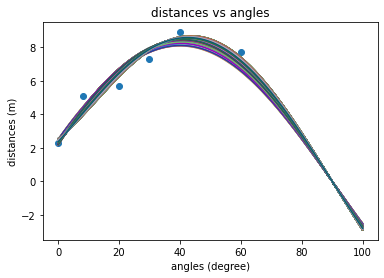

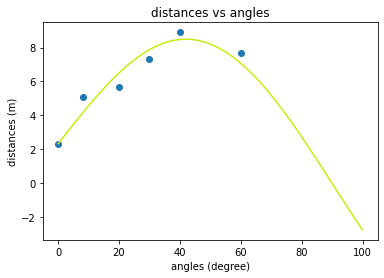

In [ ]:
import random

def gradientDescent(angles, distances, learningRate = 0.0001, iterations = 10000,
                    stopingThresh = 1e-6, gravity = 9.8):
  
  height = random.random()*0.2
  velocity = random.random()*10
  radius = random.random()*0.5

  prevCost = None

  while (iterations > 0):
    currCost = cost(angles, distances, height, velocity, gravity)
    
    if prevCost and abs(prevCost-currCost)<=stopingThresh:
      break
    
    height -= learningRate * costHeightDeriv(angles, distances, radius, height, 
                                             velocity, gravity)
    velocity -= learningRate * costVelocityDeriv(angles, distances, radius, height, 
                                             velocity, gravity)
    radius -= learningRate * costRadiusDeriv(angles, distances, radius, height,
                                             velocity, gravity)

    if height < 0 or height > 0.2 or velocity < 0 or velocity > 100 or radius < 0 or radius > 0.5:
      height = random.random()
      velocity = random.random()*10
      radius = random.random()
      iterations = 1000
    
    iterations -= 1
    
  return radius, height, velocity

allVals = []
for i in range(1000):
  radius, height, velocity = gradientDescent(angles, distances)
  print(radius, height, velocity)
  curr = theoretical(anglesBestFit, radius, height, velocity)
  allVals.append(curr)
  plt.plot(anglesBestFit, curr, color=(random.random(),random.random(),random.random()))
plt.scatter(angles, distances)
plt.ylabel("distances (m)")
plt.xlabel("angles (degree)")
plt.title("distances vs angles")
plt.show()

avg = []
for i in range(len(anglesBestFit)):
  currVal = 0
  for j in allVals:
    currVal += j[i]
  avg.append(currVal/len(allVals))

plt.plot(anglesBestFit, avg, color=(random.random(),random.random(),random.random()))
plt.scatter(angles, distances)
plt.ylabel("distances (m)")
plt.xlabel("angles (degree)")
plt.title("distances vs angles")
plt.show()

In [ ]:
def search(target):
  closest = 999
  for i in range(len(avg)):
    if anglesBestFit[i] >= 45:
      break
    if abs(avg[i]-target) < abs(avg[closest]-target):
      closest = i
  return anglesBestFit[closest]

In [ ]:
curr = float(input("Wanted distance: "))
print(search(curr))

Wanted distance: 4.5
9.700000000000001
